# Machine learning for biology, part two

Task: Predict penguin species from bill and flipper length

Approach: k-nearest neighbors (k=10)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
df = df.dropna()

In [4]:
def classify_penguin(bill_length, flipper_length):
    bill_length_difference = df['bill_length_mm'] - bill_length
    flipper_length_difference = df['flipper_length_mm'] - flipper_length
    overall_distance = np.sqrt(flipper_length_difference ** 2 + bill_length_difference ** 2)
    df['distance to new point'] = overall_distance

    most_common_species_nearby = df.sort_values('distance to new point').head(10)['species'].mode()[0]

    return most_common_species_nearby


In [5]:
predictions = df.apply(lambda x: classify_penguin(x.bill_length_mm, x.flipper_length_mm), axis=1)
(predictions == df['species']).value_counts()

True     317
False     16
dtype: int64

Our code examines the 10 nearest neighbors to our unknown data point, and determines the most common species among them. Let's try it on some made-up data.

In [7]:
sample_data = []
for i in range(35, 60):
    for j in range(170, 230):
        sample_data.append([i, j, classify_penguin(i, j)])
        
sample_data = pd.DataFrame(sample_data, columns=['bill_length', 'flipper_length', 'prediction'])
sample_data

,bill_length,flipper_length,prediction
0,35,170,Adelie
1,35,171,Adelie
2,35,172,Adelie
3,35,173,Adelie
4,35,174,Adelie
...,...,...,...
1495,59,225,Gentoo
1496,59,226,Gentoo
1497,59,227,Gentoo
1498,59,228,Gentoo


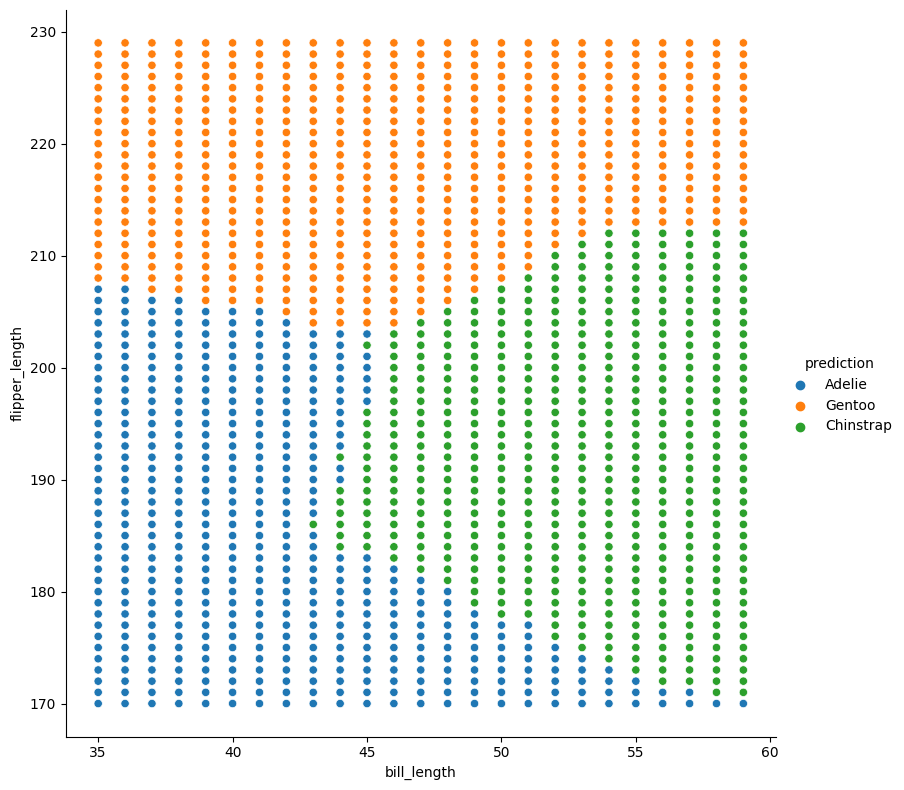

In [9]:
sns.relplot(
    data = sample_data,
    x = 'bill_length',
    y = 'flipper_length',
    hue = 'prediction',
    height = 8,
    hue_order = ['Adelie', 'Gentoo', 'Chinstrap']
)